## This is a code that implements Nick's Fourier Transform to get the Kernel Function for the Barrier:

In [132]:
from scipy.special import kv as kv # Import Bessel Function
from scipy.integrate import quad # Import function to do the integral
from time import time

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [ ]:
# Some Global Constants:
# Integration Boundary:
int_bount= 100

In [278]:
def integrand_ss(Y, y, x1, x2, b):
    '''y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    c1 = b * np.cos(y*Y) / (2 + b * np.sqrt(1+Y**2)) 
    c2 = np.exp(-np.abs(x1+x2) * np.sqrt(1 + Y**2))
    return c1*c2

def integrand_ss1(Y, y, x1, x2, b):
    '''Integrand for samples on the same side; but includes Terms for 
    Bessel Decay'''
    c1 = b * np.cos(y*Y) / (2 + b * np.sqrt(1+Y**2)) 
    c2 = np.exp(-np.abs(x1+x2) * np.sqrt(1 + Y**2))
    
    c3 = 2 * np.cos(y*Y) / (np.sqrt(1 + Y**2) * (2.0)) # These Terms will give Bessel Decay
    if x1!=x2:
        print("Hey")
        c4 = np.exp(-np.abs(x1-x2) * np.sqrt(1+Y**2)) 
    else: c4=1.0
    return (c1*c2 + c3*c4)

def integrand_ds(Y, y, x1, x2, b):
    '''Integrand for sample on different sides of the Barrier'''
    c1 = 2 * np.cos(y*Y) / (np.sqrt(1 + Y**2) * (2 + b*np.sqrt(1 + Y**2)))
    c2 = np.exp(-np.abs(x1-x2) * np.sqrt(1+Y**2))     
    return c1*c2
    
def bessel0(y, x1, x2):
    '''Give the Bessel Part of the decay.'''
    r = np.sqrt((x1-x2)**2 + y**2) # Calculates pairwise Distance
    return kv(0, r)                # Gives the Bessel Decay

<IPython.core.display.Javascript object>


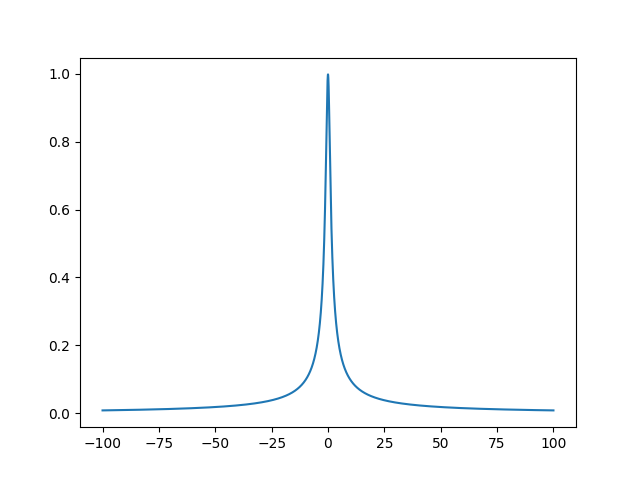

In [171]:
# Plot the Integrand:

plt.figure()
x = np.linspace(-100,100,100000)
x1 = np.linspace(1,1000,100000)
y = integrand_ds(x,0.0,-0.001,0.001,0)
plt.plot(x,y)
#plt.plot(x1,1/x1)
#plt.xscale('log')
plt.show()

In [279]:
def full_function(y, x1, x2, b):
    '''Gives the Fourier Transform of the Integrand.
    y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    if x1==x2 and y==0:  # In case of identical samples
        return 1.0
    if (x1 <= 0 and x2 <= 0) or (x1 >= 0 and x2 >= 0):  # For same side of Barrier
        return (bessel0(y,x1,x2) + quad(integrand_ss, 
                                      0, np.inf, args=(y, x1, x2, b)))[0]
        

    else: # Different side of Barrier
        return quad(integrand_ds, 
            0, np.inf, args=(y, x1, x2, b))[0]  # 0 to only extract the exact part of the integral
    
def full_function_cut_off(y, x1, x2, b, bound=np.inf):
    '''Give the Fourier Transform of the Integrand;
    but with limited Boundaries for the Integral! Integrate also 
    the term giving bessel-decay'''
    if (x1 <= 0 and x2 <= 0) or (x1 >= 0 and x2 >= 0):  # For same side of Barrier
        return quad(integrand_ss1, 0, bound, args=(y, x1, x2, b))[0]       

    else: # Different side of Barrier
        return quad(integrand_ds, 
            0, bound, args=(y, x1, x2, b))[0]  # 0 to only extract the exact part of the integral

In [280]:
#%timeit full_function(0.1,1,2,0.5)
#print(full_function(0.1, 0.3, 0.4, 0.5))
#%timeit full_function(0.1, 0.3, 0.4, 0.5)
print(full_function(0.00, -0.01, 0.02, 0.03))
print(full_function_cut_off(0.00, -0.01, 0.02, 0.03, bound=np.inf))

print(full_function_cut_off(1, 1, 1, 0))
print(full_function(1, 1, 1, 0))

3.26343961174
3.26343961174
3.16762355198
0.421024438241


<IPython.core.display.Javascript object>


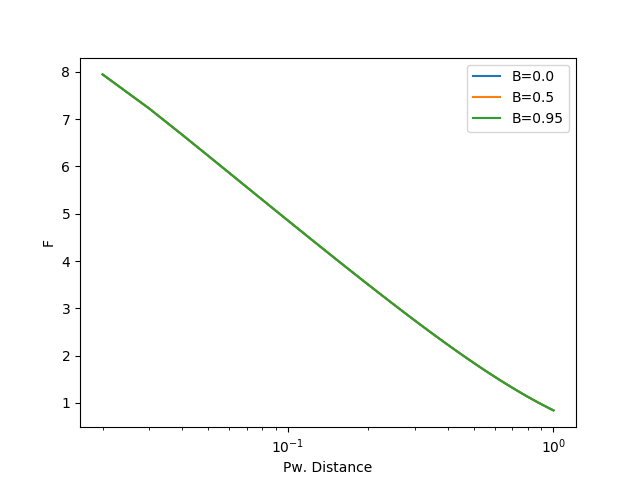

In [52]:
# Okay, now start the plotting action:
x_vec=np.linspace(0.02,1,100)
y = np.array([full_function(0.01, 0.01, x, b=0.0) for x in x_vec])
y1 = np.array([full_function(0.01, 0.01, x, b=0.5) for x in x_vec])
y2 = np.array([full_function(0.01, 0.01, x, b=0.95) for x in x_vec])

yb = np.array([full_function(0.01, -0.01, x, b=0.0) for x in x_vec])
yb1 = np.array([full_function(0.01, -0.01, x, b=0.5) for x in x_vec])
yb2 = np.array([full_function(0.01, -0.01, x, b=0.95) for x in x_vec])

# Do the Plotting
plt.figure()
plt.plot(x_vec, y + yb, label="B=0.0")
plt.plot(x_vec, y1 + yb1, label="B=0.5")
plt.plot(x_vec, y2 + yb2, label="B=0.95")


#plt.plot(x_vec,yb,label="B=0.0")
#plt.plot(x_vec,yb1,label="B=0.5")
#plt.plot(x_vec,yb2,label="B=0.95")

#plt.yscale('log')
plt.xlabel("Pw. Distance")
plt.ylabel("F")
#plt.xscale('log')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


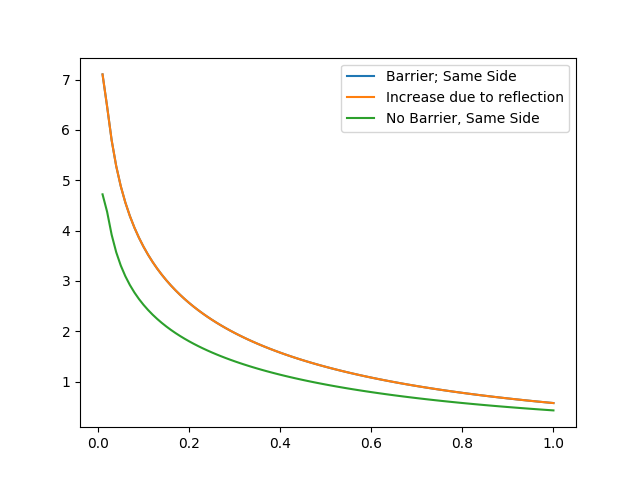

In [266]:
# Some more Sanity Checks:
x_vec=np.linspace(0.01,1,100)

y_no = np.array([full_function(0.01, 0.01, x, b=0) for x in x_vec])     # Samples K0
y_no_r = np.array([full_function(0.01, -0.01, x, b=0) for x in x_vec])   # Reflected Samples K0


y1 = np.array([full_function(0.01, -0.01, x, b=0.8) for x in x_vec])    # 
y2 = np.array([full_function(0.01, 0.01, x, b=0.8) for x in x_vec])     #

plt.figure()
plt.plot(x_vec,y2,label="Barrier; Same Side")
plt.plot(x_vec, y_no + (y_no_r-y1), label="Increase due to reflection")  # Sample plus increase due to what is missing for
plt.plot(x_vec, y_no, label="No Barrier, Same Side")                     #  
plt.legend()
#plt.plot(x_vec, 5*np.exp(-(3*x_vec)))
plt.show()

<IPython.core.display.Javascript object>


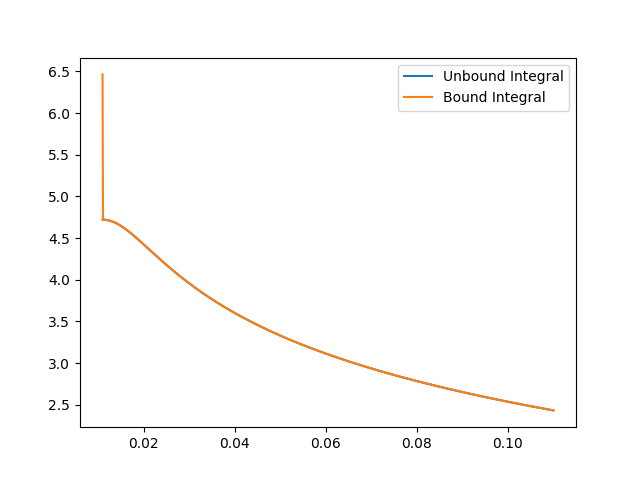

In [273]:
# Code to check whether Integral on different side of the barrier agrees with k0
x_vec = np.linspace(0.011,0.11,1000)
y0 = bessel0(-0.01, 0.011, x_vec) # Only Bessel Function
y1 = np.array([full_function_cut_off(-0.01, 0.011, x, b=0, bound=np.inf) for x in x_vec])
plt.figure()
plt.plot(x_vec, y0, label="Unbound Integral")  # Via the Bessel-function
plt.plot(x_vec, y1, label="Bound Integral")  # Via the Integral with b=0
plt.legend()
plt.show()           # Yay they are ident!!!

In [134]:
# Some trial Cells:
def f(x,a):
    return 1.0/x**a

In [135]:
quad(f, 2, np.inf, args=(3))

(0.12499999999999997, 5.841441494062356e-10)

In [238]:
def calc_kernel_mat(coords, b):
    # Produce Full Covariance Matrix
    kernel=np.array([[full_function(i[1]-j[1], i[0], j[0], b) for i in coords] for j in coords])
    return kernel

X_data = np.loadtxt('./coordinates15.csv', delimiter='$').astype('float64') # Load the complete X-Data
print(np.shape(X_data))
kernel=calc_kernel_mat(X_data[:100,:], 0.0)
print(X_data[0,:])
print(X_data[2,:])

(500, 2)
[-19. -25.]
[-19. -21.]


In [249]:
print(full_function_cut_off(-1, 0, 0, 0))
print(full_function(-1,0,0,0))

3.16762355198
0.421024438241


In [36]:
#np.linalg.eigvals(kernel)
for i in range(np.size(kernel,0)):
    kernel[i,i]=0.3
np.max(kernel)

0.29999999999999999

In [229]:
kernel[:5,:5]

array([[ 41.68916   ,   1.10770826,  -2.9673467 ,  -1.89019158,
          2.34697045],
       [  1.10770826,  41.68916   ,   1.10770826,  -2.9673467 ,
         -1.89019158],
       [ -2.9673467 ,   1.10770826,  41.68916   ,   1.10770826,  -2.9673467 ],
       [ -1.89019158,  -2.9673467 ,   1.10770826,  41.68916   ,
          1.10770826],
       [  2.34697045,  -1.89019158,  -2.9673467 ,   1.10770826,  41.68916   ]])

In [219]:
a=np.linalg.eigvals(kernel)
min(a)

2.0018960889036741

In [16]:
np.max(kernel)

1.0

In [33]:
# Bessel Kernel
# Quickly calculate a Bessel Kernel:
def calc_kernel_mat(coords):
    # Produce Full Covariance Matrix
    kernel=np.array([[bessel0(i[1]-j[1], i[0], j[0]) for i in coords] for j in coords])
    return kernel

X_data = np.loadtxt('./coordinates15.csv', delimiter='$').astype('float64') # Load the complete X-Data

print(np.size(X_data,0))

kernel=calc_kernel_mat(X_data)

500


<IPython.core.display.Javascript object>


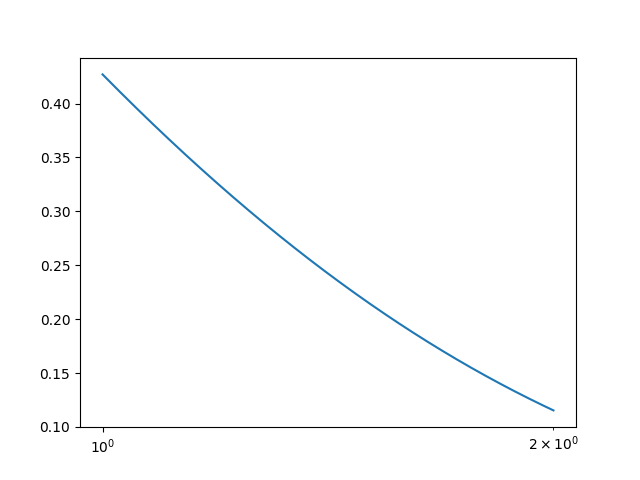

In [61]:
x=np.linspace(1,2,10000)
y=bessel0(0.0,0.01,x)
plt.figure()
plt.plot(x,y)
plt.xscale('log')
plt.show()